# Notebook Iris Dataset

Before we dive in, here’s a quick summary: the dataset contains 150
samples of iris flowers, each characterized by four features: Sepal
Length, Sepal Width, Petal Length, and Petal Width, all measured in
centimeters. These samples are grouped into three species: Setosa,
Versicolor, and Virginica. If you’re not familiar with the dataset, you
can learn more about it
[here](https://en.wikipedia.org/wiki/Iris_flower_data_set).

## Loading the dataset

Let’s start by importing the iris dataset and manipulating the dataframe
so that the column names match the feature names.

In [12]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd 

# Load toy dataset
iris = load_iris() 
 # Create dataframe using feature names
df = pd.DataFrame(iris.data, columns=iris.feature_names)

## Exploring the dataset

Let´s start by exploring the species by plotting the sepal length
vs. width in a scatter plot

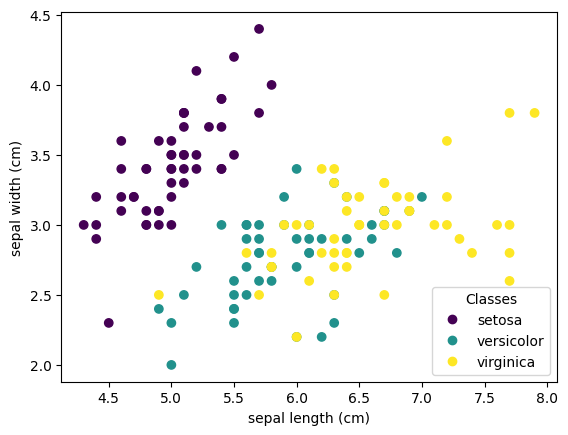

In [13]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

You can already see a pattern regarding the Setosa type, which is easily
identifiable based on its short and wide sepal. Only considering these 2
dimensions, sepal width and length, there’s still overlap between the
Versicolor and Virginica types.

## Transforming the dataset

We will now perform feature engineering and create a new feature called
petal area (`petal length * petal width`), and will do the same for the
sepal.

In [14]:
df['sepal_area'] = df['sepal length (cm)'] * df['sepal width (cm)']
df['petal_area'] = df['petal length (cm)'] * df['petal width (cm)']

Finally, let’s new information by binning the sepal length into 3
categories (short, medium and long)

In [15]:
df['sepal_length_bin'] = pd.cut(df['sepal length (cm)'], bins=3, labels=["short", "medium", "long"])
df

150 rows × 7 columns

## Computing summary statistics

Now, we can extract summary statistics of the species “setosa” and
compare it to another species

In [16]:
# Map targets to species names and add them to a new column 
df['species'] = iris.target_names[iris.target] 
# Display first few rows
df.head() 

In [17]:
# Select setosa 
df_setosa = df[df['species'] == "setosa"]
summary_stats = df_setosa.describe() 

# Display summary statistics
print(summary_stats)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  sepal_area  petal_area  
count         50.000000   50.000000   50.000000  
mean           0.246000   17.257800    0.365600  
std            0.105386    2.933775    0.181155  
min            0.100000   10.350000    0.110000  
25%            0.200000   15.040000    0.280000  
50%            0.200000   17.170000    0.300000  
75%            0.300000   19.155000    0.420000  
max           